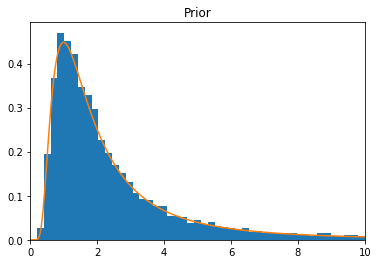

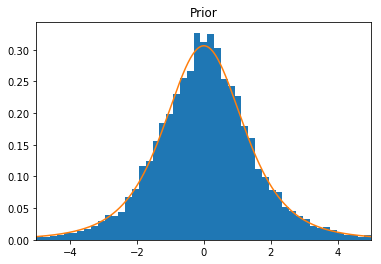

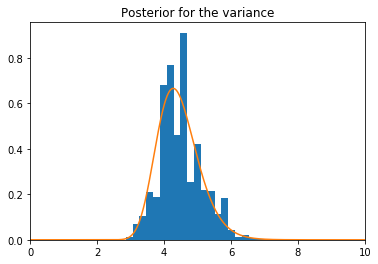

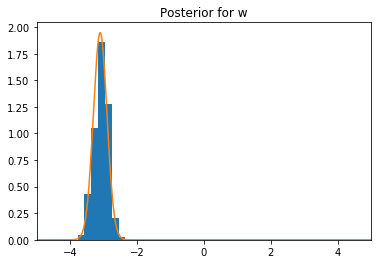

In [6]:
import numpy as np
import matplotlib .pyplot as plt
from scipy.stats import invgamma , t

m = 0
l = 1
b = 3
a = 2

N = 100
w0 = -3
X = np.random.normal(size=N)
y = X*w0 + np.random.normal(size=N)*2

# Analytical solution
s2v = np.linspace (0 ,10 ,1000)
wv = np.linspace ( -5 ,5 ,1000)
mpost = (m*l+np.sum(X*y))/(l+np.sum(X**2))
lpost = l + np.sum(X**2)
apost = a + N/2
bpost = b+.5*( np.sum(y**2)+m**2*l-(m*l+np.sum(X*y))**2/(l+np.sum(X**2)))


# Importance sampling
L = 10000

s2is = invgamma .rvs(size=L,a=a,scale=b)
plt.hist(s2is ,density=True ,bins=np.linspace (0 ,10 ,50))
plt.plot(s2v , invgamma.pdf(x=s2v ,a=a,scale=b))
plt.xlim ((0 ,10))
plt.title('Prior')
plt.show ()

wis = np.random.normal(size=L)*np.sqrt(s2is/l)+m
plt.hist(wis ,density=True ,bins=np.linspace (-5,5,50))
plt.plot(wv ,t.pdf(x=wv ,df =2*a,loc=m,scale=np.sqrt(b/(a*l))))
plt.xlim (( -5 ,5))
plt.title('Prior')
plt.show ()

weightis = 1/np.sqrt (2* np.pi*s2is)**N*np.exp ( -1/(2* s2is)*np.sum((X[:,np.newaxis ]* wis[np.newaxis ,:]-y[:,np.newaxis ])**2, axis =0))

plt.hist(s2is ,density=True ,bins=np.linspace (0 ,10 ,50) ,weights=weightis)
plt.plot(s2v , invgamma.pdf(x=s2v ,a=apost ,scale=bpost))
plt.xlim ((0 ,10))
plt.title('Posterior for the variance')
plt.show ()

plt.hist(wis ,density=True ,bins=np.linspace (-5,5,50),weights=weightis)
plt.plot(wv ,t.pdf(x=wv ,df =2* apost ,loc=mpost ,scale=np.sqrt(bpost /( lpost*apost))))
plt.xlim (( -5 ,5))
plt.title('Posterior for w')
plt.show ()

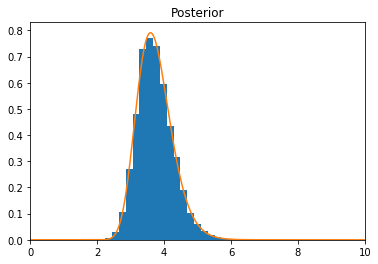

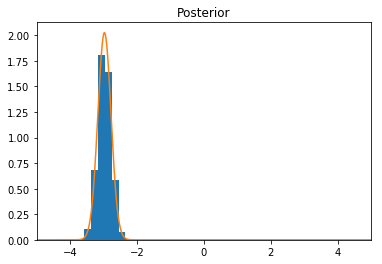

In [7]:
import numpy as np
import matplotlib .pyplot as plt
from scipy.stats import invgamma , t

m = 0
l = 1
b = 3
a = 2

N = 100
w0 = -3
X = np.random.normal(size=N)
y = X*w0 + np.random.normal(size=N)*2

# Analytical solution
s2v = np.linspace (0 ,10 ,1000)
wv = np.linspace ( -5 ,5 ,1000)
mpost = (m*l+np.sum(X*y))/(l+np.sum(X**2))
lpost = l + np.sum(X**2)
apost = a + N/2
bpost = b+.5*( np.sum(y**2)+m**2*l-(m*l+np.sum(X*y))**2/(l+np.sum(X**2)))

# Gibbs sampling
K = 10000
s2g = np.zeros(K)
wg = np.zeros(K)
wg [0] = 0
s2g [0] = 1
for k in range(K -1):
    wg[k+1] = np.random.normal ()*np.sqrt(s2g[k]/(l+np.sum(X**2)))+(m*l+np.sum(X*y))/(l+np.sum(X**2))
    s2g[k+1] = invgamma.rvs(a=a+N/2+1/2 , scale=b+1/2* np.sum((X*wg[k+1]-y)**2)+l/2*( wg[k+1]-m)**2)


plt.hist(s2g ,density=True ,bins=np.linspace (0 ,10 ,50))
plt.plot(s2v , invgamma.pdf(x=s2v ,a=apost ,scale=bpost))
plt.xlim ((0 ,10))
plt.title('Posterior')
plt.show()

plt.hist(wg ,density=True ,bins=np.linspace (-5,5,50))
plt.plot(wv ,t.pdf(x=wv ,df =2* apost ,loc=mpost ,scale=np.sqrt(bpost /( lpost*apost))))
plt.xlim (( -5 ,5))
plt.title('Posterior')
plt.show()